## __POSTTEST 7__

#### Nama  : Deby Ayu Syakhira
#### NIM   : 2109106060
#### Kelas : Informatika B1 2021

***

### Link Dataset : https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

## __1. Impor Modul yang Dibutuhkan__

In [ ]:
#mengimpor modul yang diperlukan
import matplotlib.pyplot as plt
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

# __2. Membaca/ Memuat dan Menampilkan Dataset__

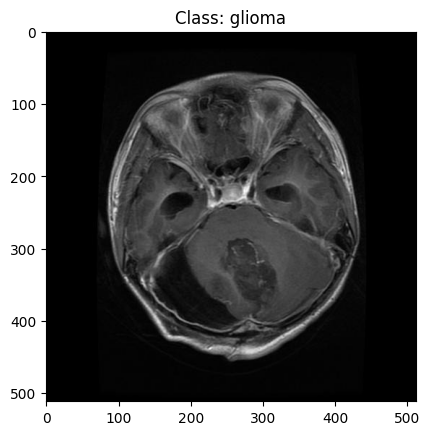

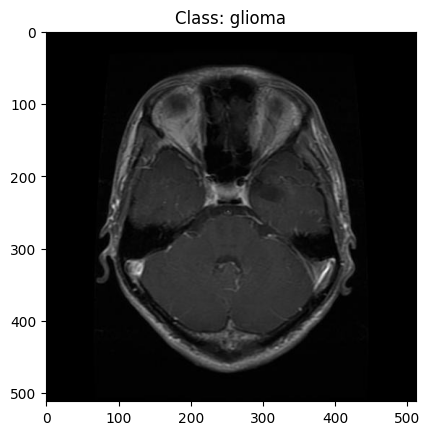

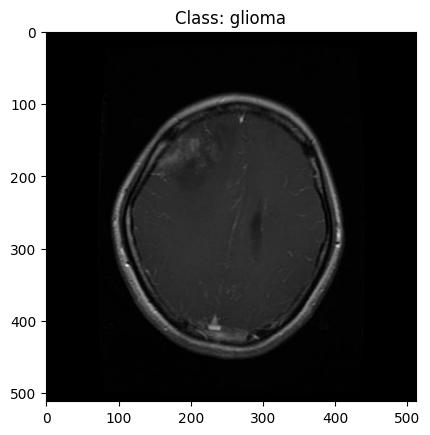

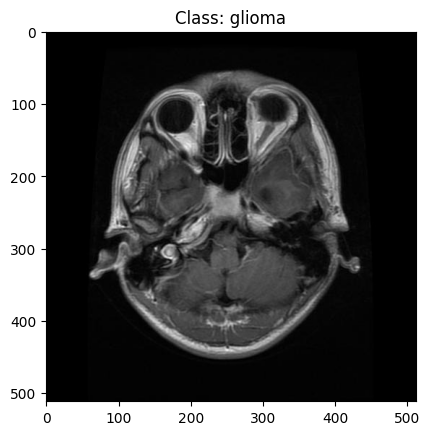

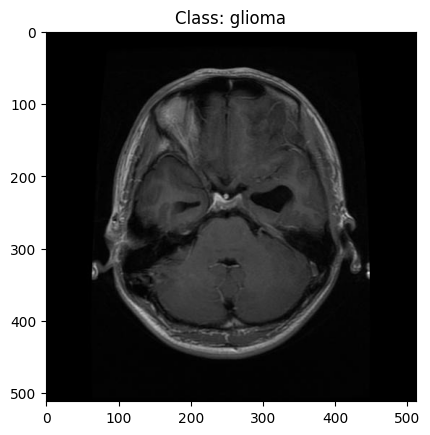

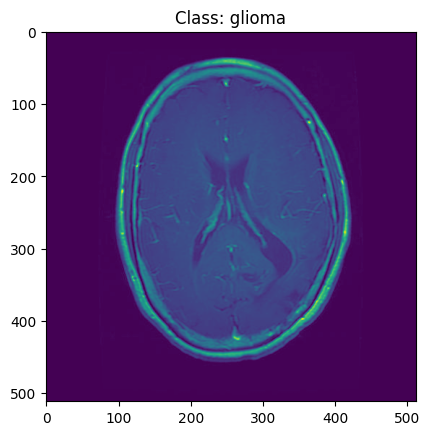

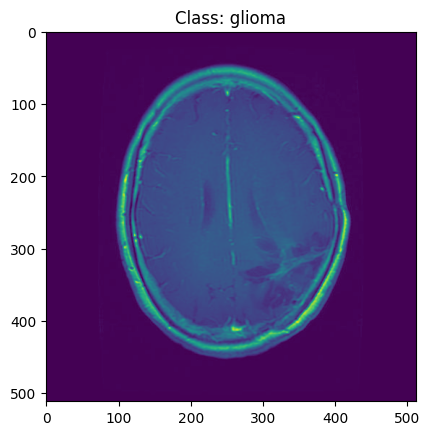

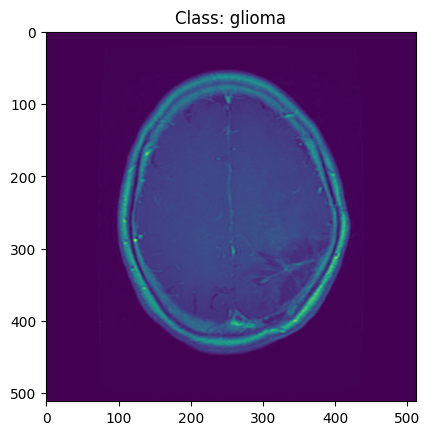

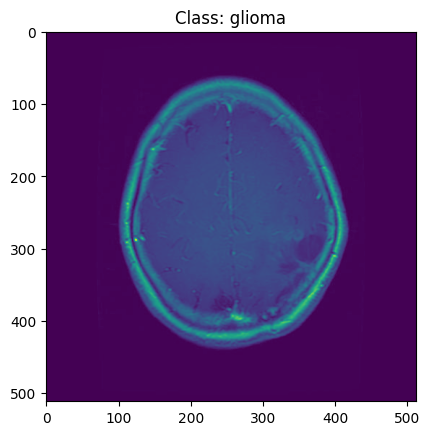

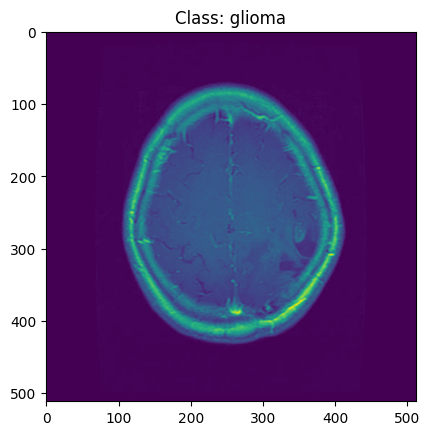

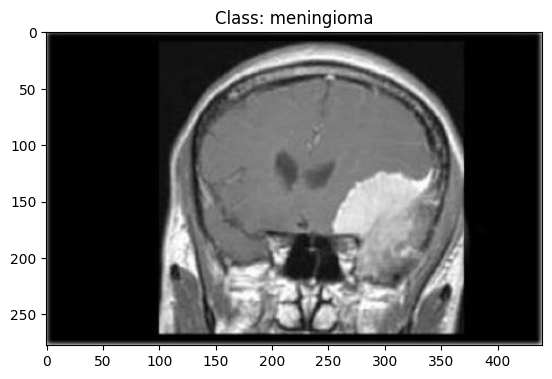

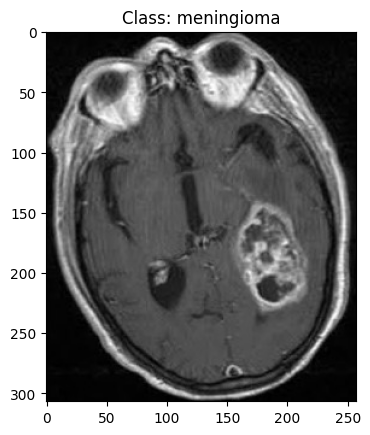

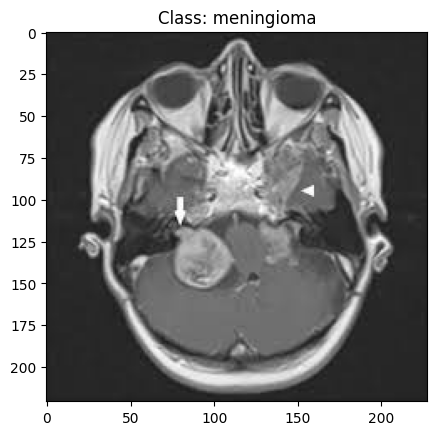

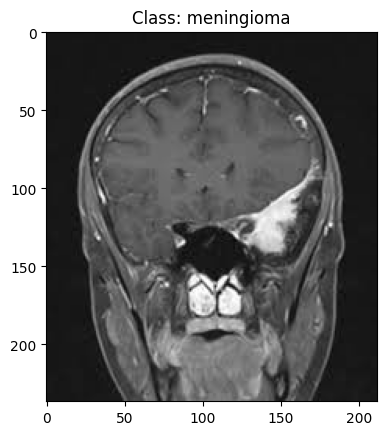

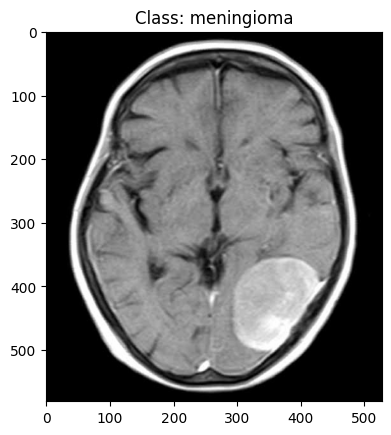

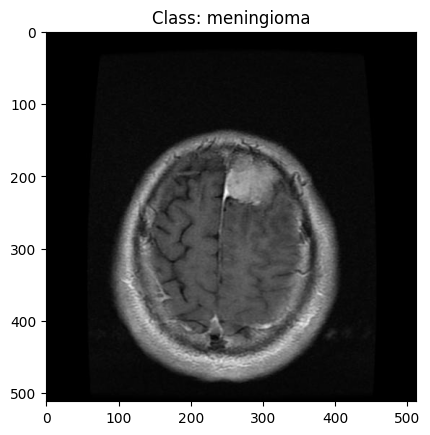

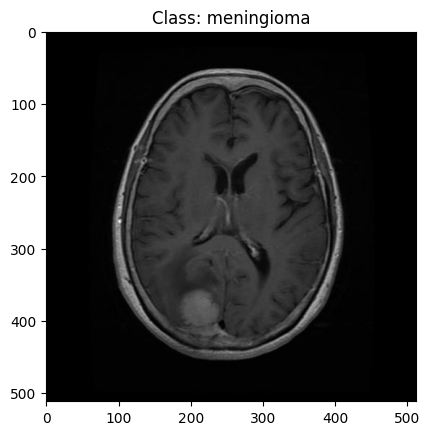

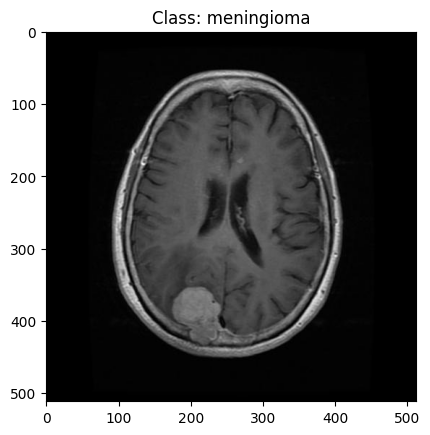

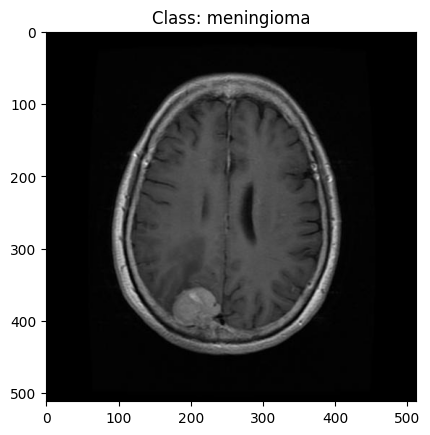

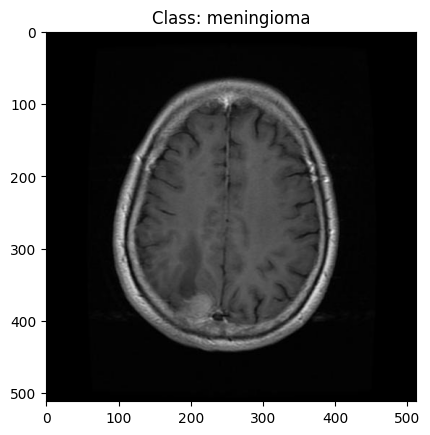

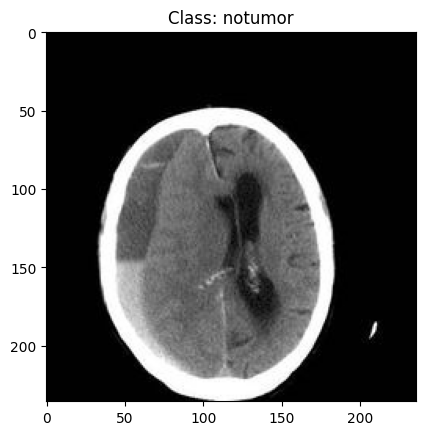

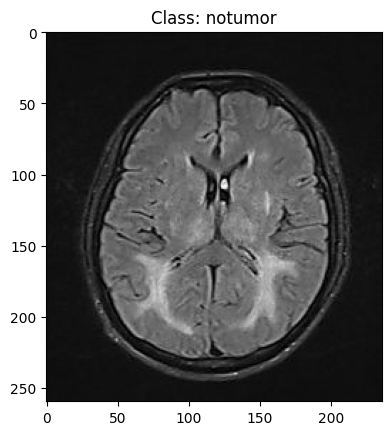

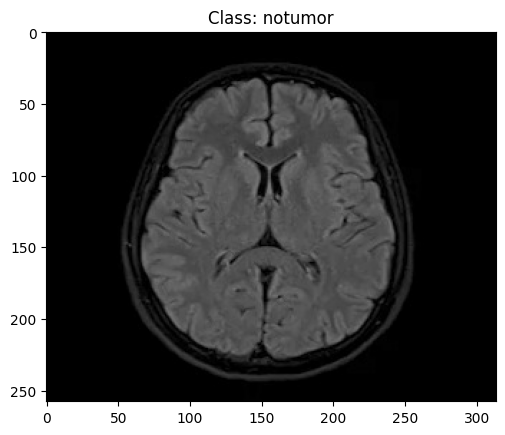

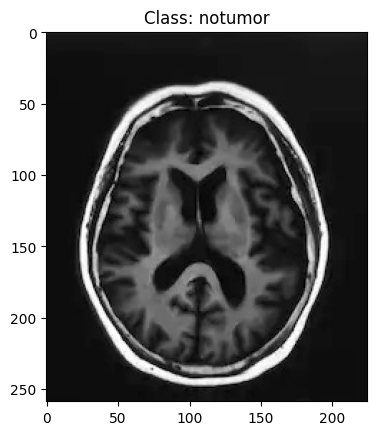

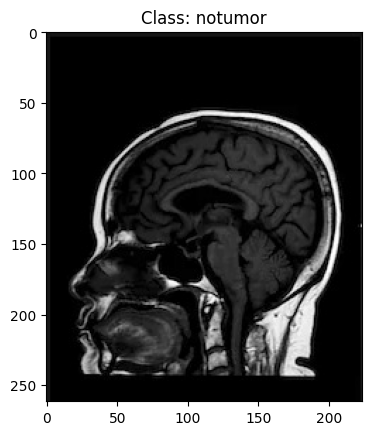

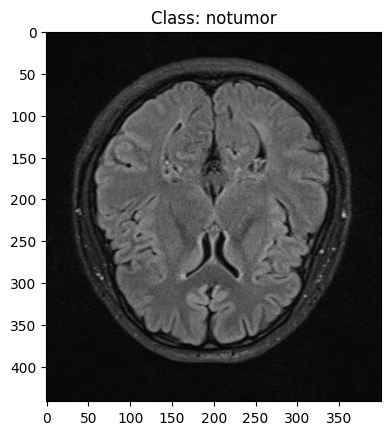

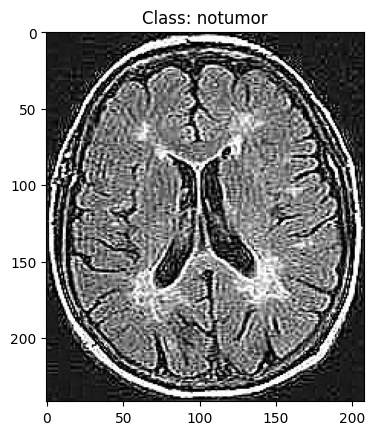

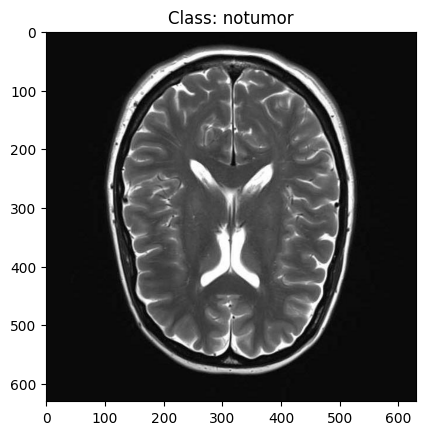

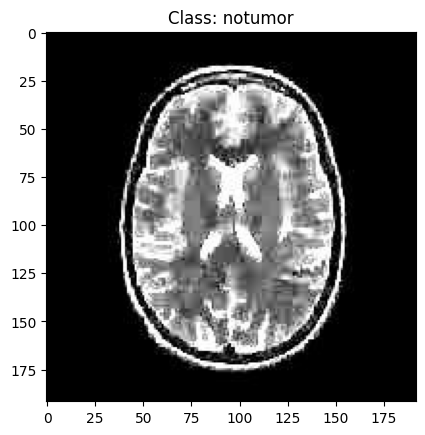

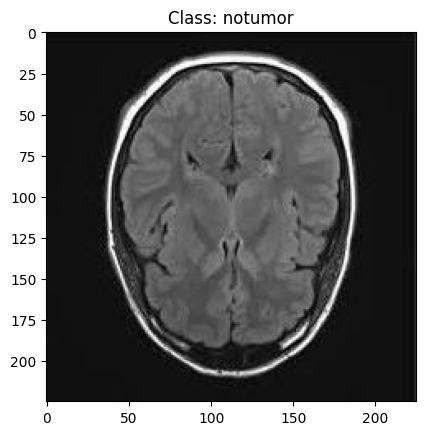

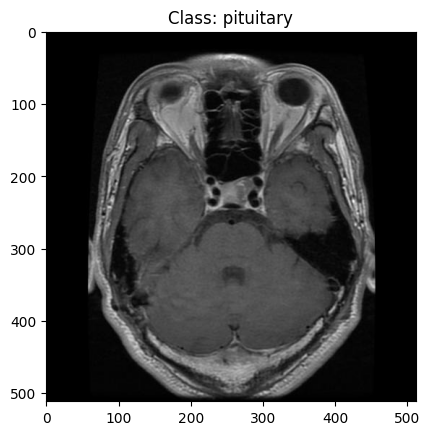

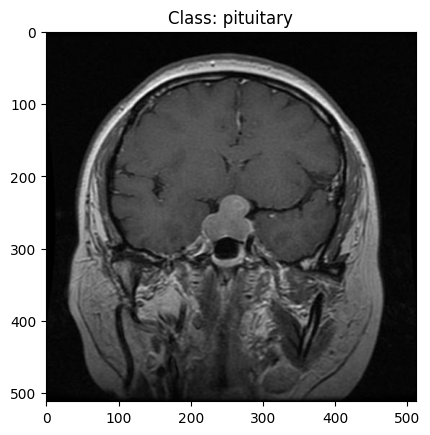

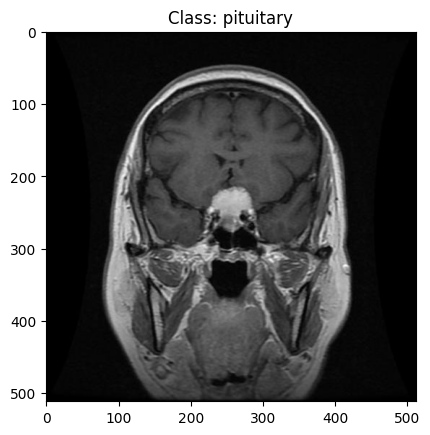

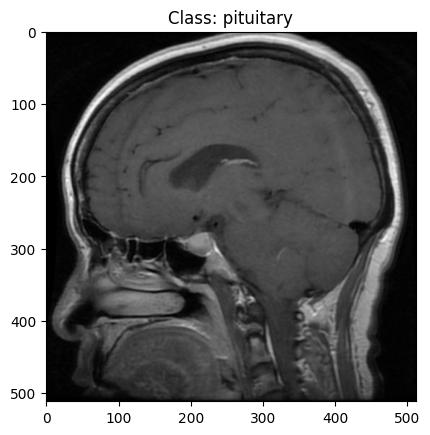

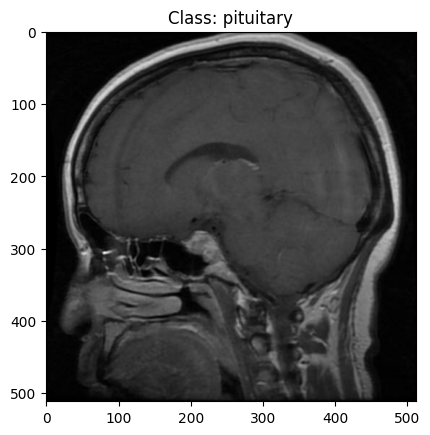

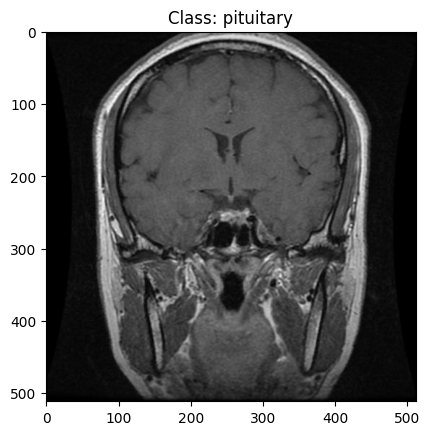

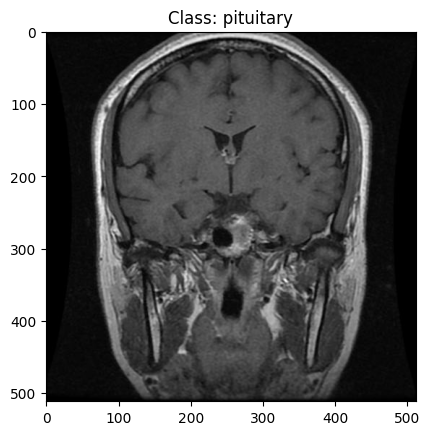

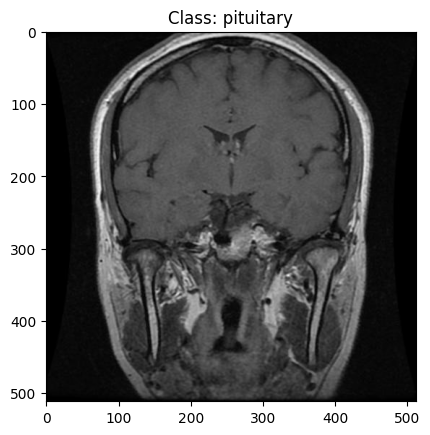

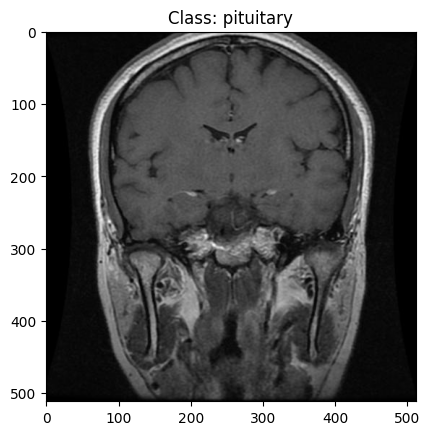

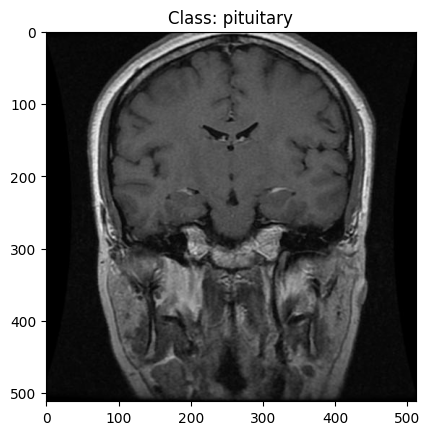

In [ ]:
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

for class_name in class_names:
    for folder_type in ['Testing', 'Training']:
        class_dir = os.path.join('/content/drive/MyDrive/POSTTESTKB/BrainTumor', folder_type, class_name)
        image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]
        for i in range(5):
            image_file = image_files[i]
            image_path = os.path.join(class_dir, image_file)
            image = plt.imread(image_path)
            plt.imshow(image)
            plt.title(f'Class: {class_name}')
            plt.show()

# __3. Melakukan Proses Augmentasi Data__

* __Membuat Datagen Untuk Mendeklarasikan ImageDataGenerator__

In [ ]:
#inisialisasi ImageDataGenerator untuk augmentasi data
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [ ]:
#inisialisasi ImageDataGenerator untuk data train dan data validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
#inisialisasi ImageDataGenerator untuk data test
test_datagen = ImageDataGenerator(
    rescale=1.0/255
)

* __Mengambil Dataset dan Menyimpan hasil augmentasi__

In [ ]:
#membuat generator untuk data train
train_dir = '/content/drive/MyDrive/POSTTESTKB/BrainTumor/Training'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training',
)

Found 4571 images belonging to 4 classes.


In [ ]:
#membuat generator untuk data validasi
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='validation',
)

Found 1141 images belonging to 4 classes.


In [ ]:
#membuat generator untuk data test
test_dir = '/content/drive/MyDrive/POSTTESTKB/BrainTumor/Testing'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
)

Found 1311 images belonging to 4 classes.


# __4. Penerapan Sequential Model__

In [ ]:
#membangun model Sequential
model = Sequential([
    Conv2D(filters=128, kernel_size=3, activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#penerapan callback 'EarlyStopping'
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
#penerapan callback 'ModelCheckpoint'
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

hasil = model.fit(train_generator, validation_data=val_generator, epochs=30, verbose=1, callbacks=[early_stopping, model_checkpoint])

Epoch 1/30
143/143 [==============================] - 52s 352ms/step - loss: 1.0273 - accuracy: 0.5218 - val_loss: 1.0017 - val_accuracy: 0.6389
Epoch 2/30
143/143 [==============================] - 49s 344ms/step - loss: 0.7504 - accuracy: 0.6988 - val_loss: 0.9219 - val_accuracy: 0.6599
Epoch 3/30
143/143 [==============================] - 50s 347ms/step - loss: 0.6723 - accuracy: 0.7313 - val_loss: 0.8469 - val_accuracy: 0.6924
Epoch 4/30
143/143 [==============================] - 48s 336ms/step - loss: 0.5855 - accuracy: 0.7537 - val_loss: 0.7589 - val_accuracy: 0.7327
Epoch 5/30
143/143 [==============================] - 51s 358ms/step - loss: 0.5713 - accuracy: 0.7648 - val_loss: 0.7553 - val_accuracy: 0.7090
Epoch 6/30
143/143 [==============================] - 48s 336ms/step - loss: 0.4921 - accuracy: 0.8116 - val_loss: 0.7598 - val_accuracy: 0.7266
Epoch 7/30
143/143 [==============================] - 49s 346ms/step - loss: 0.4887 - accuracy: 0.8046 - val_loss: 0.7634 - val_ac

# __5. Melakukan Evaluasi Model Terhadap Data Test__


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)

#menampilkan hasil evaluasi pada data test
print(f'Test Loss: {test_loss:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

41/41 [==============================] - 4s 86ms/step - loss: 0.6341 - accuracy: 0.8162
Test Loss: 0.63
Test Accuracy: 0.82


# __6. Membuat Grafik Untuk Menampilkan Pergerakan Metrics(Akurasi/Error) dan Loss Terhadap Epoch Baik Pada Training Maupun Validation__

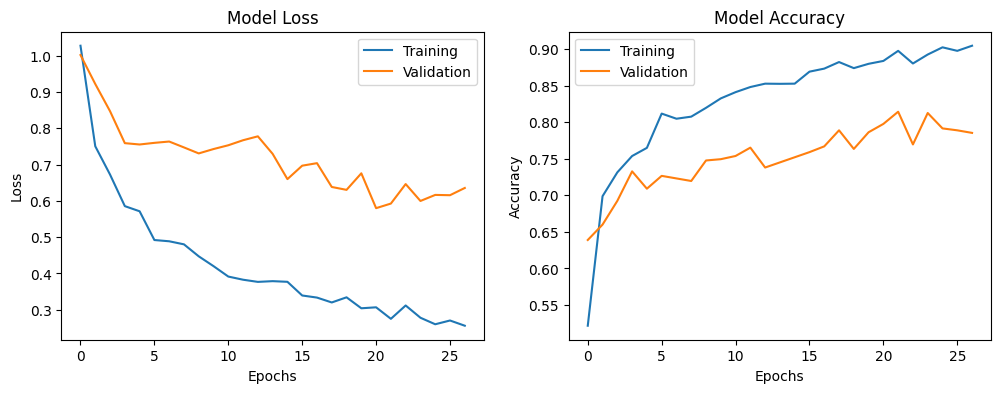

In [ ]:
training_accuracy = hasil.history['accuracy']
training_loss = hasil.history['loss']

validation_accuracy = hasil.history['val_accuracy']
validation_loss = hasil.history['val_loss']

plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training')
plt.plot(validation_loss, label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training')
plt.plot(validation_accuracy, label='Validation')
plt.title ('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()